In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Análise exploratória dos dados (EDA)

Após o processo de extração, transformação e carragamento dos dados (ETL) da Alura Cash, realizado no SQL server com o SGBD Manangement Studio, é possível carregar os dados no pandas DataFrame. Como etapa inicial da análise exploratória, precisamos entender o dado fornecido, principalmente no que tange aos tipos de variáveis envolvidas, formatação, o que cada variável representa, bem como algumas informações estatísticas.

In [ ]:
dados = pd.read_csv('/content/Alura_Cash.csv', header = None, sep = ';')
dados.columns = ['Idade', 'Salario', 'Propriedade', 'Tempo_Trabalho', 'Motivo', 'Pontuacao', 'Valor', 'Tx_Juros', 'Inadiplente', 'Renda_Percentual', 'Historico_Inadiplencia', 'Tempo_Cartao_Solicitacao_Credito']
dados.head()

,Idade,Salario,Propriedade,Tempo_Trabalho,Motivo,Pontuacao,Valor,Tx_Juros,Inadiplente,Renda_Percentual,Historico_Inadiplencia,Tempo_Cartao_Solicitacao_Credito
0,31,19968,Rent,1,Education,B,2500,"9,62",1,"0,13",N,6
1,29,42000,Rent,4,Venture,G,1600,"19,16",0,"0,04",Y,6
2,21,45000,Rent,3,Personal,A,7200,"9,38",0,"0,16",N,4
3,22,72000,Own,1,Venture,B,15000,"10,25",0,"0,21",N,4
4,24,81600,Rent,5,Venture,C,8000,"12,84",0,"0,1",Y,2


In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Idade                             28638 non-null  int64 
 1   Salario                           28638 non-null  int64 
 2   Propriedade                       28638 non-null  object
 3   Tempo_Trabalho                    28638 non-null  int64 
 4   Motivo                            28638 non-null  object
 5   Pontuacao                         28638 non-null  object
 6   Valor                             28638 non-null  int64 
 7   Tx_Juros                          28638 non-null  object
 8   Inadiplente                       28638 non-null  int64 
 9   Renda_Percentual                  28638 non-null  object
 10  Historico_Inadiplencia            28638 non-null  object
 11  Tempo_Cartao_Solicitacao_Credito  28638 non-null  int64 
dtypes: int64(6), objec

Não há dados nulos, haja vista que este conjunto de dados já foi previamente trabalhado no SQL server, conforme documentado no reporsitório Alura_Cash. Analisando em detalhes o conjunto de dados somado ao retorno da função info(), é possível verificar que os campos referêntes a Tx_Juros e Renda_Percentual são do tipo objeto, portanto uma string e além disso, possui como separador decimal a ',', que não é o padrão utilizado no python/pandas. Para continuar a explorar estes dados, é necessário corrigir estes desvios.

O processo de correção ocorrerá em duas etapas, conforme descrito abaixo:

* Substituição do separador decemal ',' por '.', utilizando o método str.replace().

* Modificação do tipo de variável partindo de str para float, utilizando o método astype().

In [ ]:
dados['Tx_Juros'] = dados['Tx_Juros'].str.replace(',', '.')
dados['Renda_Percentual'] = dados['Renda_Percentual'].str.replace(',', '.')
dados['Tx_Juros'] = dados['Tx_Juros'].astype('float')
dados['Renda_Percentual'] = dados['Renda_Percentual'].astype('float')

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Idade                             28638 non-null  int64  
 1   Salario                           28638 non-null  int64  
 2   Propriedade                       28638 non-null  object 
 3   Tempo_Trabalho                    28638 non-null  int64  
 4   Motivo                            28638 non-null  object 
 5   Pontuacao                         28638 non-null  object 
 6   Valor                             28638 non-null  int64  
 7   Tx_Juros                          28638 non-null  float64
 8   Inadiplente                       28638 non-null  int64  
 9   Renda_Percentual                  28638 non-null  float64
 10  Historico_Inadiplencia            28638 non-null  object 
 11  Tempo_Cartao_Solicitacao_Credito  28638 non-null  int64  
dtypes: f

Após corrigir os desvios de formatação do conjunto de dados, podemos tirar alguns insghts preliminares a partir de uma análise estatística utilizando o método describe().

In [ ]:
dados.describe()

,Idade,Salario,Tempo_Trabalho,Valor,Tx_Juros,Inadiplente,Renda_Percentual,Tempo_Cartao_Solicitacao_Credito
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


* A média de idade dos clientes que possuem conta no banco Alura Cash e solicitaram emprestimo bancário é de 28 anos, portanto estamos lidando com um publico jovem. Esta informação também pode ser relevante para a equipe de marketing da Alura Cash bem como para a equipe de planejamento econômico e estratégico.

* Em média, é solicitado empréstimos com o valor de R$ 9656,49 com taxa de juros médio de 11% ao ano. Esta é uma informação sensível para a equipe financeira, a fim de balizar a liberação de pacotes de crédito.

* Quanto a renda média anual dos clientes da Alura Cash, temos o valor de R$ 66.649,00. Portanto a fração da renda anual solicitada em crédito em média é de 0,16%. A priori esta informação pode parecer pouco factível, possívelmente por se tratar de um conjunto de dados fictício, portanto passível de diversos fatores no momento de sua criação, que podem enviesar o banco de dados criado.

Buscando aprofundar a análise do perfil de clientes que solicitam crédito a Alura Cash, podemos separá-los em grupos com base na renda anual.

Classificação dos grupos:

A --> renda anual menor ou igual a R$ 40.000,00

B --> renda anual entre R$ 60.000,00 e 40.000,00

C --> renda anual entre R$ 80.000,00 e 60.000,00

D --> renda anual entre R$ 100.000,00 e 80.000,00

E --> renda anual entre R$ 120.000,00 e 100.000,00

F --> renda anual entre R$ 140.000,00 e 120.000,00

G --> renda anual acima de R$ 140.000,00

In [ ]:
grupo = []
for i in dados['Salario']:
  if i <=40000:
    grupo.append('A')
  elif i <= 60000:
    grupo.append('B')
  elif i <= 80000:
    grupo.append('C')
  elif i <= 100000:
    grupo.append('D')
  elif i <= 120000:
    grupo.append('E')
  elif i <= 140000:
    grupo.append('F')
  else:
    grupo.append('G')

dados['Grupo'] = grupo

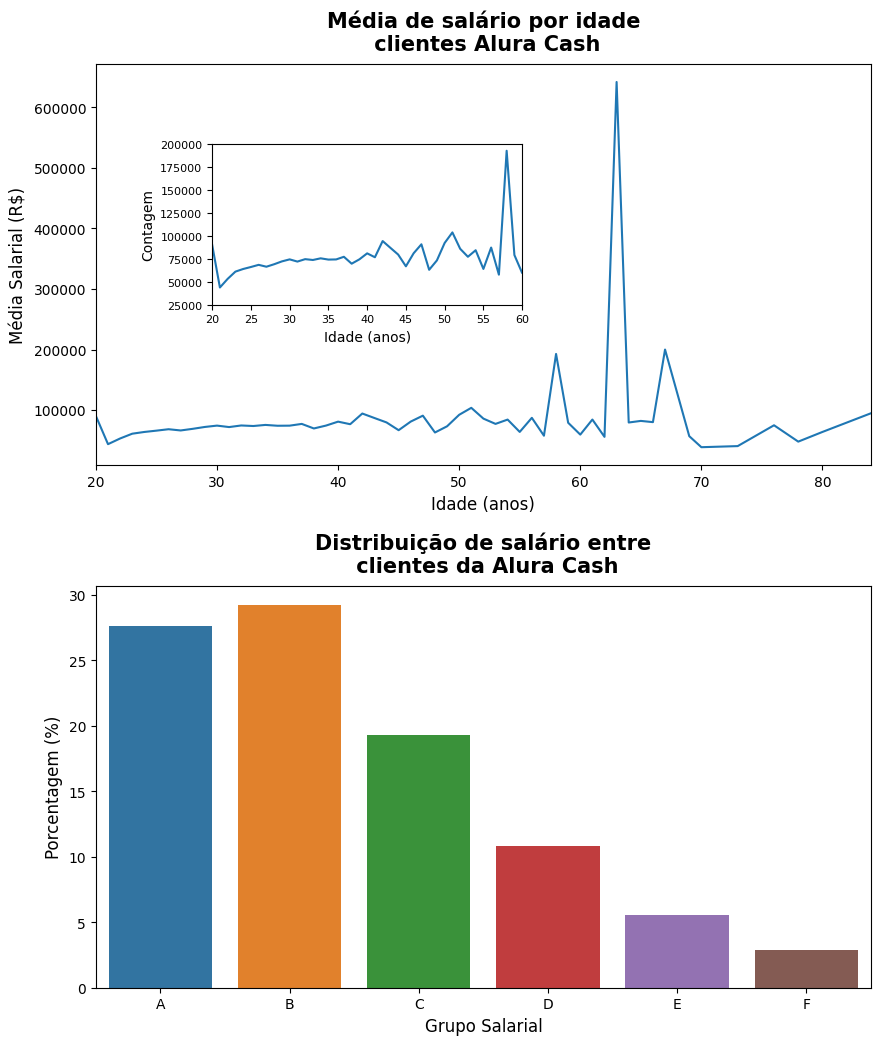

In [ ]:
########Realizando consulta########

clientes = dados[['Idade', 'Salario']].groupby('Idade').mean().reset_index()
clientes.drop(index = clientes[['Idade']].query('Idade > 90').index, inplace = True)

########Preparando o ambiente da figura########

fig = plt.figure(figsize = (10,12))

########Figura 1########

plt.subplot(2,1,1)
ax = sns.lineplot(data = clientes,
                  x = 'Idade',
                  y = 'Salario')
ax.set_title('Média de salário por idade\n clientes Alura Cash',
             fontsize = 15,
             weight = 'bold',
             pad = 10)
ax.set_xlabel('Idade (anos)', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 10)
ax.set_ylabel('Média Salarial (R$)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 10)
ax.set_xlim(20, 84)

########Figura 1 - Anexo########

ax2 = ax.inset_axes([0.15, 0.4, 0.4, 0.4])
sns.lineplot(data = clientes,
             x = 'Idade',
             y = 'Salario',
             ax = ax2)
ax2.set_xlabel('Idade (anos)', fontsize = 10)
ax2.xaxis.set_tick_params(labelsize = 8)
ax2.set_ylabel('Contagem', fontsize = 10)
ax2.yaxis.set_tick_params(labelsize = 8)
ax2.set_xlim(20, 60)
ax2.set_ylim(25000, 200000)

########Figura 2########

plt.subplot(2,1,2)
ax = sns.barplot(data = dados,
                 x = dados.Grupo.value_counts(normalize = True).index,
                 y = dados.Grupo.value_counts(normalize = True) * 100,
                 order = ['A', 'B', 'C', 'D', 'E', 'F'])
ax.set_title('Distribuição de salário entre\n clientes da Alura Cash',
             fontsize = 15,
             weight = 'bold',
             pad = 10)
ax.set_xlabel('Grupo Salarial', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 10)
ax.set_ylabel('Porcentagem (%)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 10)

########Ajuste Geral########
plt.subplots_adjust(hspace=0.3)
plt.show()

A Figura de média salarial por idade dos clientes aponta que os clientes que possuem maior renda são aqueles com idade superior a 50 anos. Existem algumas idades cujo comportamento destoa do esperado como é o caso de 58, 63 e 67 anos, suscitando o aparecimento de picos de rendimentos. A este comportamento é possível atribuir o fato de haver clientes com estas idades cuja liquidez dos bens seja expressívemente superior a dos demais clientes. Apesar de ser uma justificativa plausível, trata-se de uma inferência, sendo necessário uma avaliação mais robusta dos dados dos clientes inclusive com informações adicionais, que não cabem ao propósito desta atividade.

A análise da distribuição da renda dos clientes da Alura Cash agrupadas em 6 grupos distintos representando faixas de rendimentos, revela que os grupos A, B e C representam cerca de 80% da renda de todos os clientes cadastrados, seguido pelos grupos D e E que representam cerca de 17 % dos clientes e por fim o grupo F que representa 3% dos clientes. Portanto, os pacotes de créditos devem ser concebidos para atender as necessidades destes três grupos.

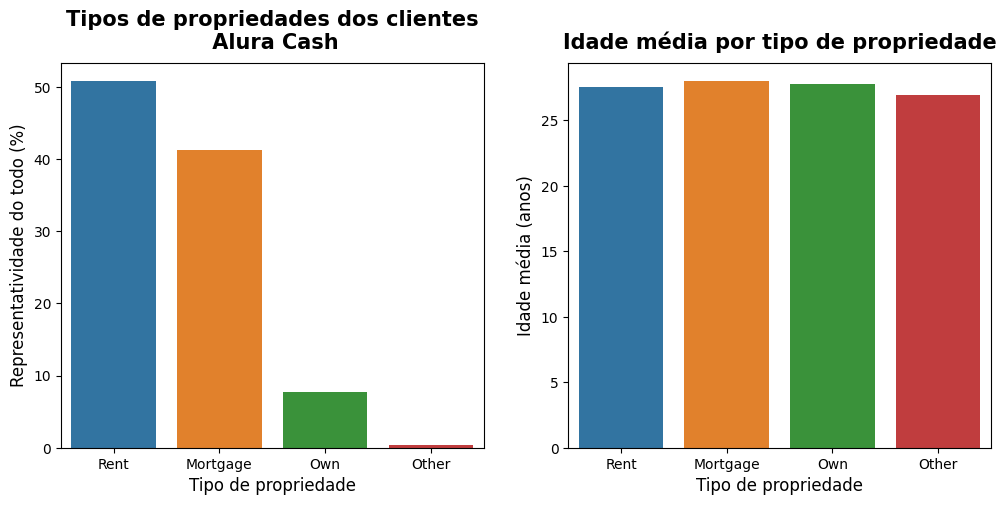

In [ ]:
########Preparando o ambiente da figura########

fig = plt.figure(figsize = (12,5))

########Figura 1########

plt.subplot(1,2,1)
ax = sns.barplot(x = dados['Propriedade'].value_counts(normalize = True).index,
                 y = (dados[['Propriedade']].value_counts(normalize = True)*100))
ax.set_title('Tipos de propriedades dos clientes\n Alura Cash',
             fontsize = 15,
             weight = 'bold',
             pad = 10)
ax.set_xlabel('Tipo de propriedade', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 10)
ax.set_ylabel('Representatividade do todo (%)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 10)

########Figura 2########

plt.subplot(1,2,2)
ax= sns.barplot(data = dados[['Idade', 'Propriedade']].groupby('Propriedade').mean('Idade').reset_index(),
                x = 'Propriedade',
                y = 'Idade',
                order = ["Rent", "Mortgage", "Own", "Other"])
ax.set_title('Idade média por tipo de propriedade',
             fontsize = 15,
             weight = 'bold',
             pad = 10)
ax.set_xlabel('Tipo de propriedade', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 10)
ax.set_ylabel('Idade média (anos)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 10)

plt.show()

Buscando enriquecer a compreenção do perfil dos clientes da Alura Cash, avaliou-se o status da propriedade em que cada cliente reside. A análise revelou que mais de 90% dos clientes residem em imóveis alugados ou hipotecados. Este comportamento pode ser associado ao fato de que em sua grande maioria, as solicitações de créditos são de valores baixos em comparação a tipicos valores praticados na compra de imóveis, indicando que o destino do crédito não é para compra de imóvel próprio. De fato, as análises seguintes revelarão que a grande motivação das solicitações de crédito na Alura Cash é para fíns educacionais. Além do mais, a idade dos clientes não aparenta ser relevante para separar grupos etários cujo o status de imóvel seja característico.

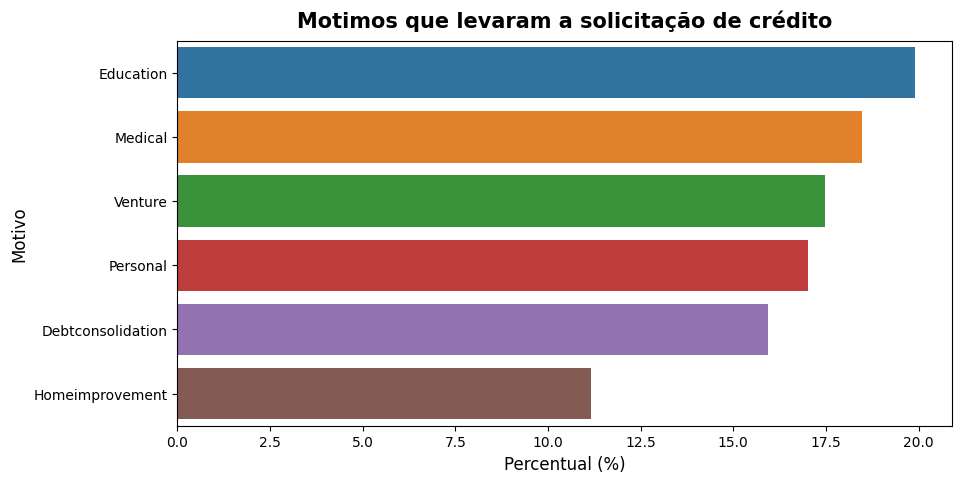

In [ ]:
########Preparando o ambiente da figura########

fig = plt.figure(figsize=(10,5))

########Figura########

ax = sns.barplot(x = dados['Motivo'].value_counts(normalize = True) * 100,
                 y = dados['Motivo'].value_counts(normalize = True).index)
ax.set_title('Motimos que levaram a solicitação de crédito',
             fontsize = 15,
             weight ='bold',
             pad = 10)
ax.set_xlabel('Percentual (%)', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 10)
ax.set_ylabel('Motivo', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 10)


plt.show()

Os motivos que levaram os clientes da Alura Cash a solicitar crédito bancário foram em sua maioria motivados por cuidado próprio, nas esfera educaional, saúde e viagem. A liquidação de débitos é um dos menores motivos que levaram os clientes a solicitar crédito, possivelmente associado a baixa taxa de clientes com histórico de crédito, levando a construir um perfil de cliente com controle financeiro em dia.

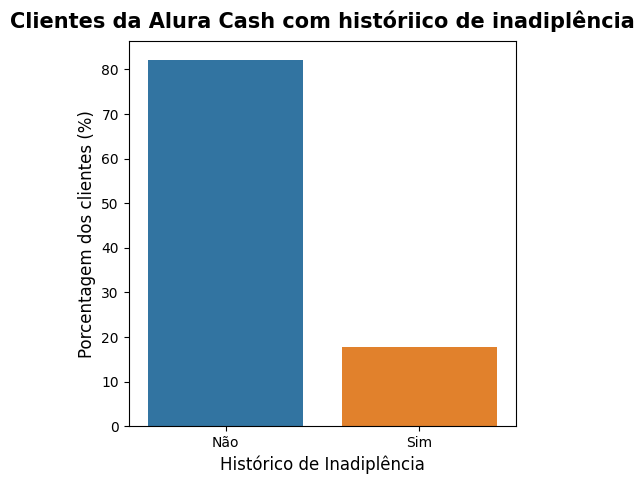

In [ ]:
########Preparando o ambiente da figura########

fig = plt.figure(figsize = (5,5))

########Figura########

ax = sns.barplot(
    x = dados['Historico_Inadiplencia'].value_counts(normalize = True).index,
    y = dados['Historico_Inadiplencia'].value_counts(normalize = True) * 100
)
ax.set_title('Clientes da Alura Cash com históriico de inadiplência',
             fontsize = 15,
             weight = 'bold',
             pad =10)
ax.set_xlabel('Histórico de Inadiplência', fontsize = 12)
ax.xaxis.set_tick_params(labelsize = 10)
ax.set_ylabel('Porcentagem dos clientes (%)', fontsize = 12)
ax.yaxis.set_tick_params(labelsize = 10)
ax.set_xticklabels(["Não", "Sim"])

plt.show()

Mais de 80% dos clientes não possuem histórico de débito, portanto o perfil de cliente é de bom controle financeiro. Um questionamento que inevitavelmente emerge deste dado é se os clientes com histórico de inadiplência, tendem a não cumprir os compromissos financeiros impostos na liberação de crédito. Para responder a esta pergunta, dividimos os clientes em dois grupos, com e sem histórico de inadiplência, e avaliamos as taxas atuais de inadiplência.

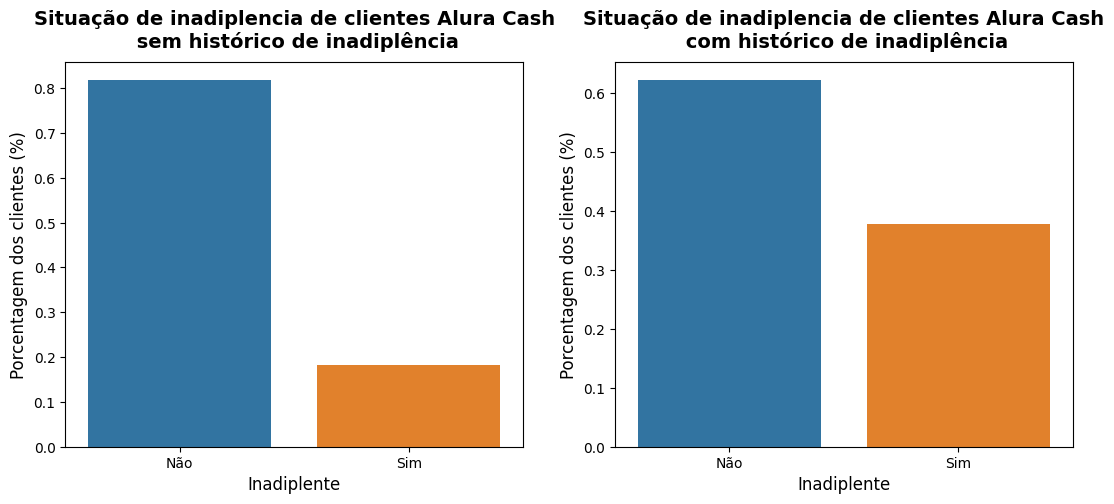

In [ ]:
########Preparando o ambiente da figura########

fig = plt.figure(figsize=(13,5))

########Figura 1########

plt.subplot(1,2,1)
ax = sns.barplot(x = dados.query('Historico_Inadiplencia == "N"')['Inadiplente'].value_counts(normalize = True).index,
                 y = dados.query('Historico_Inadiplencia == "N"')['Inadiplente'].value_counts(normalize = True))
ax.set_title('Situação de inadiplencia de clientes Alura Cash\n sem histórico de inadiplência',
             fontsize = 14,
             weight = 'bold',
             pad = 10)
ax.set_xlabel('Inadiplente', fontsize = 12)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_ylabel('Porcentagem dos clientes (%)', fontsize=12)
ax.yaxis.set_tick_params(labelsize=10)
ax.set_xticklabels(["Não", "Sim"])

########Figura 2########

plt.subplot(1,2,2)
ax = sns.barplot(x = dados.query('Historico_Inadiplencia == "Y"')['Inadiplente'].value_counts(normalize = True).index,
                 y = dados.query('Historico_Inadiplencia == "Y"')['Inadiplente'].value_counts(normalize = True))
ax.set_title('Situação de inadiplencia de clientes Alura Cash\n com histórico de inadiplência', fontsize = 14, weight = 'bold', pad = 10)
ax.set_xlabel('Inadiplente', fontsize = 12)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_ylabel('Porcentagem dos clientes (%)', fontsize=12)
ax.yaxis.set_tick_params(labelsize=10)
ax.set_xticklabels(["Não", "Sim"])

plt.show()

Existe uma forte correlação entre clientes com histórico de inadiplência serem reincidentes nesta prática. Esta informação é fundamental para a implementação de estratégias de minimização de riscos no momento de aprovação de crédito, poupando maiores prejuízos.

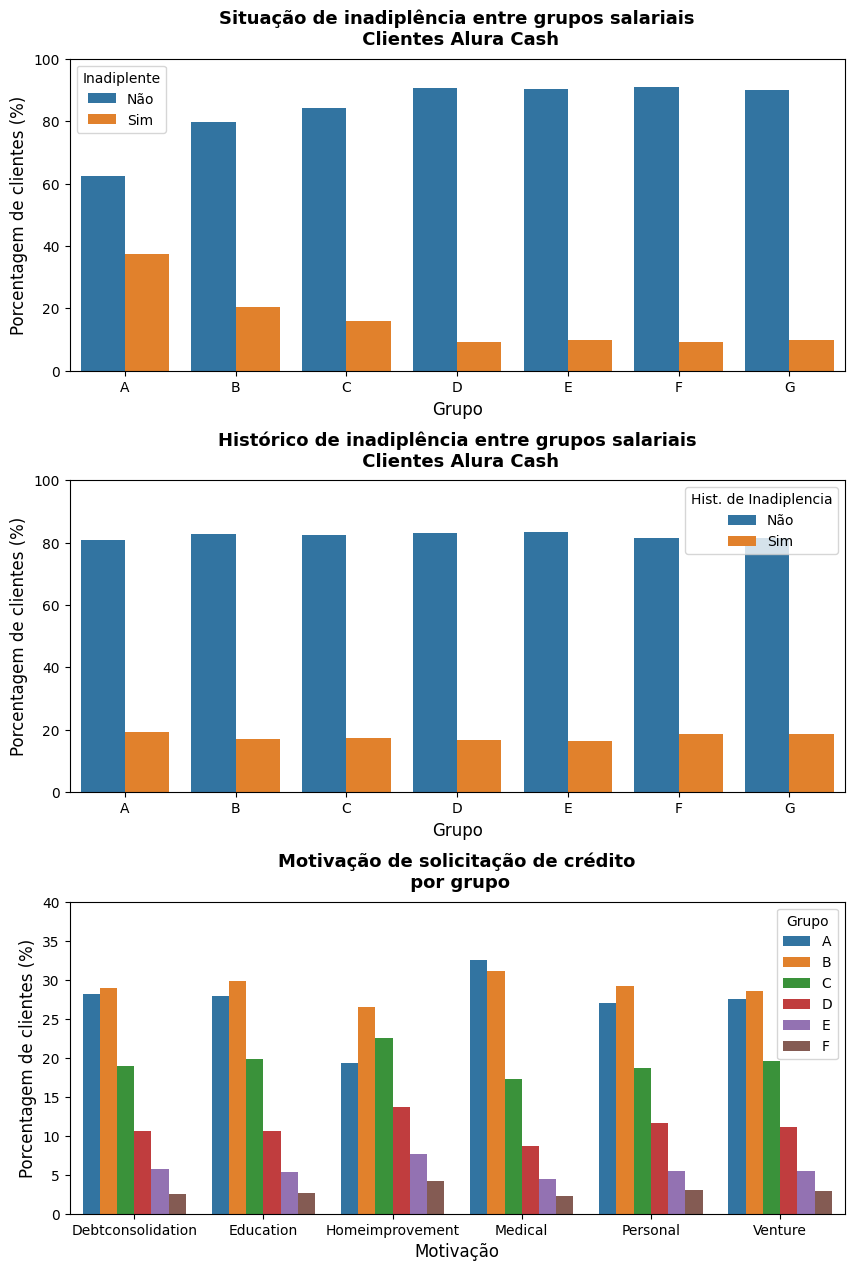

In [ ]:
########Realizando consulta########

data=dados[['Inadiplente', 'Grupo']].groupby('Grupo').value_counts(normalize = True).reset_index(name = 'porcentagem')
data['porcentagem'] = data['porcentagem'] *100

########Preparando o ambiente da figura########

fig = plt.figure(figsize=(10,15))

########Figura 1########

plt.subplot(3,1,1)
ax=sns.barplot(data = data,
               x='Grupo',
               y='porcentagem',
               hue='Inadiplente')
ax.set_title('Situação de inadiplência entre grupos salariais\n Clientes Alura Cash',
             fontsize = 13,
             weight='bold',
             pad=10)
ax.set_xlabel('Grupo', fontsize = 12)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_ylabel('Porcentagem de clientes (%)', fontsize=12)
ax.yaxis.set_tick_params(labelsize=10)
ax.set_ylim(0,100)

########Legenda figura 1########

h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Não', 'Sim'], title="Inadiplente", loc ='best')

########Realizando consulta########

data=dados[['Historico_Inadiplencia', 'Grupo']].groupby('Grupo').value_counts(normalize = True).reset_index(name = 'porcentagem')
data['porcentagem'] = data['porcentagem'] *100

########Figura 2########

plt.subplot(3,1,2)
ax=sns.barplot(data = data,
               x='Grupo',
               y='porcentagem',
               hue='Historico_Inadiplencia')
ax.set_title('Histórico de inadiplência entre grupos salariais\n Clientes Alura Cash',
             fontsize = 13,
             weight='bold',
             pad=10)
ax.set_xlabel('Grupo', fontsize = 12)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_ylabel('Porcentagem de clientes (%)', fontsize=12)
ax.yaxis.set_tick_params(labelsize=10)
ax.set_ylim(0,100)

########Legenda figura 2########

h, l = ax.get_legend_handles_labels()
ax.legend(h, ['Não', 'Sim'], title="Hist. de Inadiplencia", loc ='best')

########Realizando consulta########

data=dados[['Motivo', 'Grupo']].groupby('Motivo').value_counts(normalize = True).reset_index(name = 'porcentagem')
data['porcentagem'] = data['porcentagem'] *100

########Figura 3########

plt.subplot(3,1,3)
ax=sns.barplot(data = data,
               x='Motivo',
               y='porcentagem',
               hue='Grupo',
               hue_order =['A', 'B', 'C', 'D', 'E', 'F'])
ax.set_title('Motivação de solicitação de crédito\n por grupo',
             fontsize = 13,
             weight='bold',
             pad=10)
ax.set_xlabel('Motivação', fontsize = 12)
ax.xaxis.set_tick_params(labelsize=10)
ax.set_ylabel('Porcentagem de clientes (%)', fontsize=12)
ax.yaxis.set_tick_params(labelsize=10)
ax.set_ylim(0,100)
ax.set_ylim(0, 40)

########Ajustes gerais########
fig.subplots_adjust(hspace=0.35)
plt.show()


Dentro do conjunto de clientes que solicitaram crédito a esta instituição financeira, aqueles pertencentes aos grupo A, B e C são os que possuem maior fragilidade econômica e portanto mais sucetíveis a problemas financeiros acarretando na contração de dívida com a instituição financeira em questão.

Ademais, para todos os motivos de solicitação de crédito os grupos A, B e C são os mais frequentes, o que também pode justificar o porque há mais clietes em débito pertencentes a estes grupos, haja vista que este grupos são os mais ativos no quesito solicitação/liberação de crédito da Alura Cash.

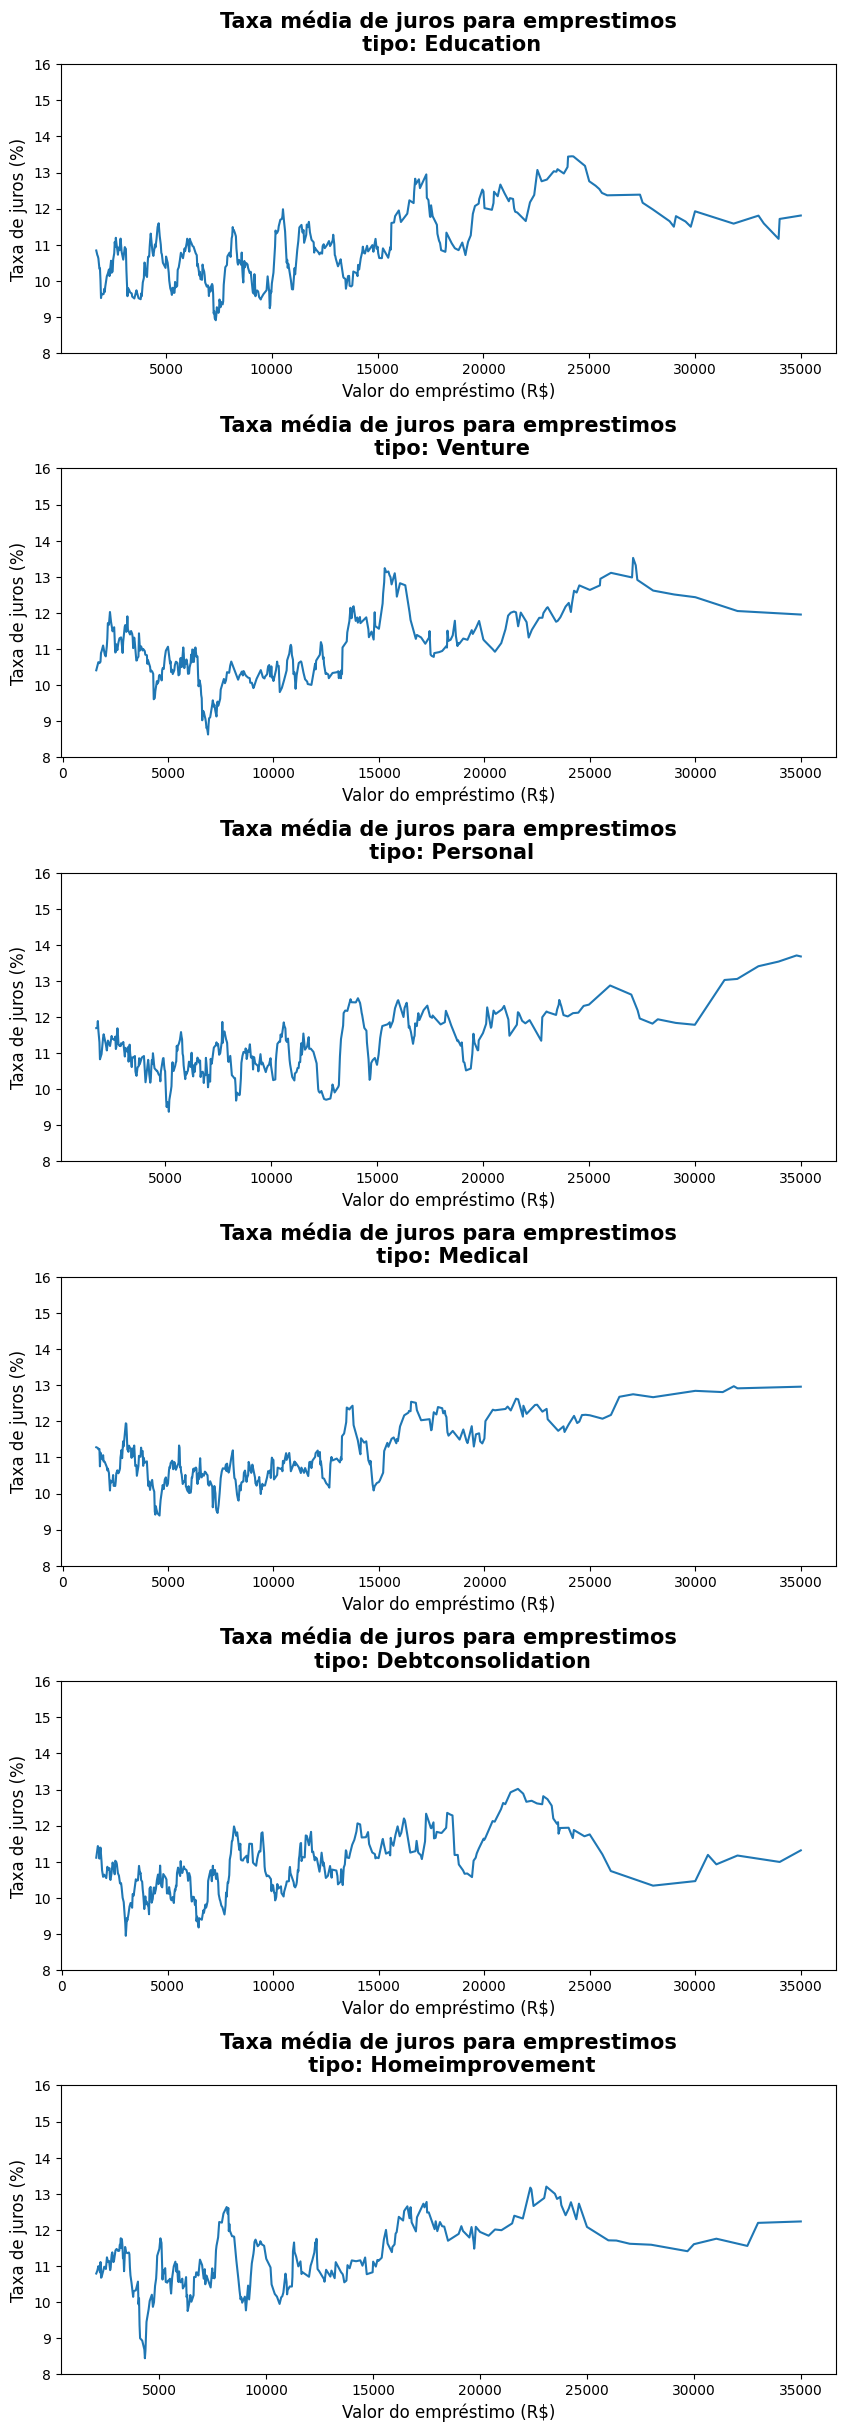

In [ ]:
########Preparando o ambiente da figura########
fig = plt.figure(figsize=(10,30))
contagem = 1

########Conjunto de Figuras########

for i in dados['Motivo'].unique():
  data = dados.query(f'Motivo == "{i}"')[['Valor', 'Tx_Juros']].groupby('Valor').mean('Tx_Juros').reset_index()
  data = data.assign(media=data.Tx_Juros.rolling(15).mean())

  plt.subplot(6,1,contagem)
  ax = sns.lineplot(data = data,
                    x='Valor',
                    y = 'media')
  ax.set_title(f'Taxa média de juros para emprestimos\n tipo: {i}', fontsize = 15, weight ='bold', pad=10)
  ax.set_xlabel('Valor do empréstimo (R$)', fontsize=12)
  ax.xaxis.set_tick_params(labelsize = 10)
  ax.set_ylabel('Taxa de juros (%)', fontsize=12)
  ax.yaxis.set_tick_params(labelsize=10)
  ax.set_ylim(8,16)
  contagem = contagem +1

########Ajustes gerais########

fig.subplots_adjust(hspace=0.4)
plt.show()
